In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import skew

EJERCICIO 1

Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia


In [12]:
df = pd.read_csv('insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Tabla de contingencia para sexo y smoker

ins_data_crosstab = pd.crosstab(df['sex'], 
                            df['smoker']) 
print(ins_data_crosstab) 

smoker   no  yes
sex             
female  547  115
male    517  159


In [14]:
# Tabla de contingencia para region y smoker
ins_data_crosstab = pd.crosstab(df['region'], 
                            df['smoker']) 
print(ins_data_crosstab) 

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


In [15]:
# Tabla de contingencia para edad y cantidad de hijos 

bins_age = np.arange(18, 68, 10)
bins_children = np.arange(0, 5+1, 1)


df["age_groups"] = pd.cut(df["age"], bins=bins_age)
df["children_groups"] = pd.cut(df["children"], bins=bins_children)


age_child_crosstab = pd.crosstab(df["age_groups"], 
                            df["children_groups"]) 
print(age_child_crosstab) 

children_groups  (0, 1]  (1, 2]  (2, 3]  (3, 4]  (4, 5]
age_groups                                             
(18, 28]             60      43      25       5       5
(28, 38]             81      61      41       6       3
(38, 48]             91      72      35       7       8
(48, 58]             64      46      37       5       2


In [16]:
# Tabla de contingencia para edad y smoker

age_smoker_crosstab = pd.crosstab(df['age_groups'], df['smoker'])
print(age_smoker_crosstab)

smoker       no  yes
age_groups          
(18, 28]    253   68
(28, 38]    201   58
(38, 48]    212   64
(48, 58]    233   41


- Coeficiente de correlación de las variables numéricas del dataset.


In [17]:
matriz_correlacion = np.corrcoef(df['age'], df['charges'])
print(matriz_correlacion)

[[1.         0.29900819]
 [0.29900819 1.        ]]


In [18]:
matriz_correlacion1 = np.corrcoef(df['bmi'], df['charges'])
print(matriz_correlacion1)

[[1.         0.19834097]
 [0.19834097 1.        ]]


In [27]:
matriz_correlacion=np.corrcoef(df["age"],df["bmi"])
print(matriz_correlacion)

[[1.         0.10927188]
 [0.10927188 1.        ]]


In [28]:
matriz_correlacion_2=np.corrcoef(df["age"],df["children"])
print(matriz_correlacion_2)

[[1.       0.042469]
 [0.042469 1.      ]]


- Sesgos de alguna de las variables numéricas del dataset.


In [19]:
skewness_bmi = skew(df['bmi'])
print(skewness_bmi)

0.28372857291709386


<AxesSubplot:ylabel='Frequency'>

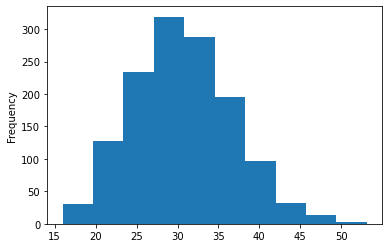

In [20]:
df_bmi = df['bmi']
df_bmi.plot.hist()

In [21]:
skewness_charges = skew(df['charges'])
print(skewness_charges)

1.5141797118745743


<AxesSubplot:ylabel='Frequency'>

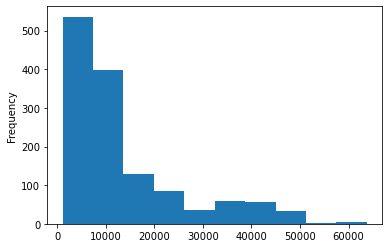

In [22]:
df_charges = df['charges']
df_charges.plot.hist()

In [26]:
skewness1=skew(df["age"])
print(f"El sesgo de la columna edad es: {skewness1}")
skewness2=skew(df["bmi"])
print(f"El sesgo de la columna bmi es: {skewness2}")
skewness3=skew(df["children"])
print(f"El sesgo de la columna children es: {skewness3}")
skewness4=skew(df["charges"])
print(f"El sesgo de la columna charge es: {skewness4}")

El sesgo de la columna edad es: 0.055610083072599126
El sesgo de la columna bmi es: 0.28372857291709386
El sesgo de la columna children es: 0.9373281163874423
El sesgo de la columna charge es: 1.5141797118745743


- Intervalo de confianza de algunas de las variables numéricas del dataset

In [25]:
data_age=df["age"]
confianza_age=st.t.interval(alpha=0.95, df=len(data_age)-1, loc=np.mean(data_age), scale=st.sem(data_age))
print(f"El intervalo de confianza de la columna age es: {confianza_age}")
print(f"Y su media es: {np.mean(data_age)}")
print("----------------------------------------------------------------------")
data_bmi=df["bmi"]
confianza_bmi=st.t.interval(alpha=0.95, df=len(data_bmi)-1, loc=np.mean(data_bmi), scale=st.sem(data_bmi))
print(f"El intervalo de confianza de la columna bmi es: {confianza_bmi}")
print(f"Y su media es: {np.mean(data_bmi)}")
print("----------------------------------------------------------------------")
data_children=df["children"]
confianza_children=st.t.interval(alpha=0.95, df=len(data_children)-1, loc=np.mean(data_children), scale=st.sem(data_children))
print(f"El intervalo de confianza de la columna children es: {confianza_children}")
print(f"Y su media es: {np.mean(data_children)}")
print("----------------------------------------------------------------------")
data_charges=df["charges"]
confianza_charges=st.t.interval(alpha=0.95, df=len(data_charges)-1, loc=np.mean(data_charges), scale=st.sem(data_charges))
print(f"El intervalo de confianza de la columna charges es: {confianza_charges}")
print(f"Y su media es: {np.mean(data_charges)}")

El intervalo de confianza de la columna age es: (38.453516373452935, 39.96053444866964)
Y su media es: 39.20702541106129
----------------------------------------------------------------------
El intervalo de confianza de la columna bmi es: (30.336346903054096, 30.99044681891898)
Y su media es: 30.663396860986538
----------------------------------------------------------------------
El intervalo de confianza de la columna children es: (1.030266383064163, 1.159569192421637)
Y su media es: 1.0949177877429
----------------------------------------------------------------------
El intervalo de confianza de la columna charges es: (12620.954034192644, 13919.890496089869)
Y su media es: 13270.422265141257


EJERCICIO 3

Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

En las Tablas de contingencia podemos observar la relación que existe entre las dos variables seleccionadas.
Podemos observar, por ejemplo:

- Que no parece haber una relación entre ser fumador o no y el sexo.
- Que tampoco parece haber una relación clara entre ser fumador y la región de residencia. 
- Esperabamos observar una mayor variabilidad entre grupos de edades y cantidad de hijos (menor cantidad de hijos a más jóvenes), pero esta diferencia es muy leve.
- Lo más común es no tener o tener un hijo independientemente de la edad. 
- Es menos común tener de 3 hijos en adelante. 

Coeficientes de correlación:

Hemos calculado los coeficientes de correlación para los siguientes pares de variables:

- Edad y Costes
- IMC y Costes
- Edad y IMC
- Edad y cantidad de hijos

Los índices de correlación para todas las combinaciones son bajos (<0.3), lo cual nos hace pensar que no existe relación entre estas variables. 

Sesgos:

Calculamos los sesgos para todas las variables numéricas. 

- Para el caso del BMI, el sesgo es positivo, y se puede observar en el histograma una pequeña cola hacia la derecha, sin embargo, el valor se acerca bastante a cero y por la gráfica se ve una distribución casi normal. 

- En el caso de los Costes, el sesgo es positivo y mayor a 1, por lo cual está sesgado hacia la dereacha, lo cual se observa claramente en el histograma. 


Intervalos de confianza:

Hemos calculado los intervalos de confianza para todas las variables numéricas. 
El intervalo más amplio lo observamos en la variable Costes (los datos con mayor dispersión), aunque tampoco es un rango muy elevado. 
